# WGRP PACKAGE

Generalized Renewal Processes are useful for approaching the rejuvenation of dynamical systems resulting from planned or unplanned interventions [[1]](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0133772).
This notebook presents the use of the WGRP package, which allows the analysis of generalized renewal processes based on the Weibull distribution. The following codes present a use for specific problems chosen, but the use of the package is much broader and can be applied to several other problems involving processes of a stochastic nature.

For specific information about the functions, look for the official package documentation.

The package installation should be done primarily through the Python Package Index (PyPI), with the following command:
```shell
pip install wgrp

```
If you have problems with dependencies, you can download an older version to avoid conflicts with your installed packages, or use a virtual environment.

The package provides a wide range of tools for modeling and analyzing generalized renewal processes, but also relies on a simple approach similar to packages like scikit-learn, where if you have a problem with the time between failures of a filter, you can simply use functions like ``fit`` or ``predict``, which fit your data to a model and predict the next occurrences.

In [12]:
# Importing the entire package allows access to all available modules but may also bring modules that will not be used
#import wgrp

# It is suggested to import modules individually, as in the line below the model that deals with model adjustment and data forecasting and other functions is imported
from wgrp.model import *

From now on, we will continue with examples, the data mentioned here is available in the /data folder of the package repository and the sources from which they were obtained will also be referenced as they appear.

# Offshore facility dataset

The first dataset is a shutdown dataset of a compressor system of an offshore installation [[2]](https://www.sciencedirect.com/science/article/abs/pii/S0378375805001758?via%3Dihub). 

In [13]:
# Import pandas to read data
import pandas as pd

# system of an offshore installation https://www.sciencedirect.com/science/article/abs/pii/S0378375805001758?via%3Dihub
offshore = pd.read_csv('./data/Offshore.csv')
offshore.head()

,Time,FM,Severity
0,220.0,1.0,I
1,233.0,1.0,I
2,234.0,1.4,I
3,240.0,2.6,D
4,265.0,1.0,I


In [14]:
# starting a wgrp template
wgrp = wgrp_model()

The author says that the downtime of the dataset is recorded in hours, so we can fit our model to its time measurement without having to convert, the default unit of failure is in ``days``, it is also seen that the time is accumulated, that is, it is marked when the next stop occurs in relation to a time 0 and not the last failure, the default of the fit is false, so we pass these arguments to the ``fit`` function.

In [15]:
# adjusting the WGRP models
wgrp.fit(data=list(offshore['Time'].values), time_unit='hours', cumulative=True, optimizer='sa')

Forecasts are generated using simulation from the parameters $\alpha$, $\beta$ and $q$ of the original series. The number of series generated is 10,000, but there is no maximum limit. From the simulation, it is observed which quantile of these series best fits the original series, and the best series are selected using the RMSE of each series in relation to the original. The average of these series is called the 'best prediction'. The arguments can be controlled in the following parameters: `n_forecasts`, which defines the number of forecasts; `random_series`, which determines the number of random series generated; and `top_n_series`, which specifies the number of series for the best forecast. The `predict` function always returns the average of the forecasts, while the other forecasts can be accessed via objects, as in the example below. Spelling and grammar errors to improve text clarity.

In [16]:
# Predict future events mean
predict  = wgrp.predict(n_forecasts = 20, random_series=10000, top_n_series=3)

# all predictions
wgrp.predictions['dataframe']

alpha = 3.7170608477800284
beta = 0.5333194814068204
q = 0.024060815649974147


,Intervention,Quantile_2.5,Mean,Quantile_97.5,newQuantile,best_prediction
0,1,13.00,19.74,57.36,13.59,14.48
1,2,13.21,27.09,82.42,16.43,25.81
2,3,13.89,35.19,103.73,20.72,45.07
3,4,15.15,43.88,125.41,26.05,52.20
4,5,17.20,53.11,148.33,32.06,63.50
...,...,...,...,...,...,...
100,101,1096.97,1636.69,2320.34,1459.44,1517.24
101,102,1104.16,1644.42,2332.72,1466.64,1525.48
102,103,1110.17,1652.43,2345.91,1475.52,1526.58
103,104,1120.52,1660.19,2357.05,1482.20,1529.02


In addition to the forecasts, it is possible to access several objects, such as a table that provides information about each of the formalisms used, and their respective parameters calculated for the series.

In [17]:
# MLE, AIC, AICc, BIC parameter estimates and Log-Likelihood (LL) measures of WGRP models for the dataset
wgrp.df_

,Formalism,AIC,AICc,BIC,LL,alpha,beta,q,y_prev,y_corr
0,RP,646.57,646.72,651.46,-321.29,14.73,0.80,0.00,None,None
1,NHPP,643.19,643.34,648.08,-319.60,2.63,0.70,1.00,None,None
2,Kijima I,638.21,638.51,645.54,-316.11,3.72,0.53,0.02,1,1
3,Kijima II,640.97,641.27,648.30,-317.48,6.48,0.59,0.29,0,0
4,Intervention type-based,644.97,645.73,657.18,-317.48,7.90,0.59,0.29,0.285081,0.149849


There is also the possibility to plot a graph directly through the package using the `plot` function, and select the amount of random series that appear on the graph.

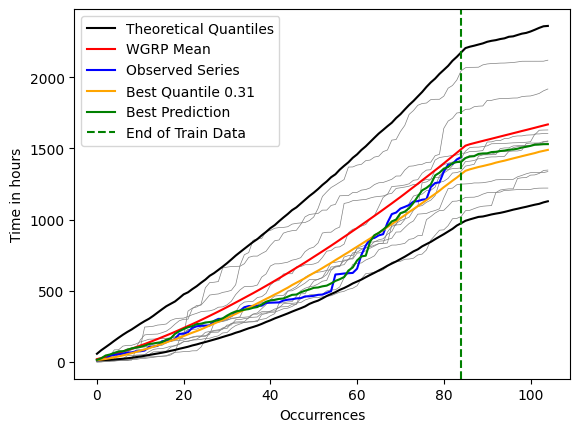

In [18]:
wgrp.plot(n_random_series=10)

# Windshield dataset

The following set of faults in an aircraft windshield is presented. The author emphasizes that the faults do not originate from the manufacturing of the part but rather from data collected during the flight, and that the faults do not cause damage to the rest of the aircraft but rather to the replacement of the windshield [[3]](https://books.google.com.br/books?hl=pt-PT&lr=&id=1c5B6w9RZHYC). The author also highlights that the unit of measurement is thousands of hours.

In [19]:
# windshield dataset https://books.google.com.br/books?hl=pt-PT&lr=&id=1c5B6w9RZHYC
windshield = pd.read_csv('./data/windshield.csv')

In [20]:
# starting a wgrp template
wgrp2 = wgrp_model()

In [21]:
# adjusting the WGRP models
# wgrp.fit(data=list((windshield['FailureTimes']*1000).values), time_unit='hours', cumulative=True)